In [34]:
import csv
from matplotlib import pyplot as plt
import scipy
import numpy as np

def read_csv_as_secs_elapsed_and_celsius(filename):
    # sep13_trial_one_data = []
    with open(filename, "r") as f:
    #     sep13_trial_one_reader = csv.reader(f)
        rows = [r for r in csv.reader(f)]

        times_secs = []
        temps_celsius = []

        # Skip header
        for row in rows[1:]:
            time_str = row[0]
            fahr = float(row[1])
            cels = (fahr - 32) * (5/9)

            h, m, s = time_str.split(':')
            secs = int(h) * 3600 + int(m) * 60 + int(s)

            times_secs.append(secs)
            temps_celsius.append(cels)

        t0 = times_secs[0]
        times_secs = [(t - t0) for t in times_secs]
    
    
    return times_secs, temps_celsius

sep13_trial_one_data = read_csv_as_secs_elapsed_and_celsius(r"./data/Cooling data - Sep 13 Trial 1.csv")
sep13_trial_two_data = read_csv_as_secs_elapsed_and_celsius(r"./data/Cooling data - Sep 13 Trial 2.csv")
sep14_trial_one_data = read_csv_as_secs_elapsed_and_celsius(r"./data/Cooling data - Sep 14 Trial 1.csv")



Afit,Bfit,Cfit: 45.468576633165355 0.0012735740189979685 53.19266145676736
Slope at fit region end: -1.01012196902752 C/min
Afit,Bfit,Cfit: 31.281012759809848 0.005273694768250134 65.87507260215655
Slope at fit region end: -0.3966813277307482 C/min
Afit,Bfit,Cfit: 62.48822562029856 0.0019711232024803684 46.0896539961859
Slope at fit region end: -2.379225761705342 C/min


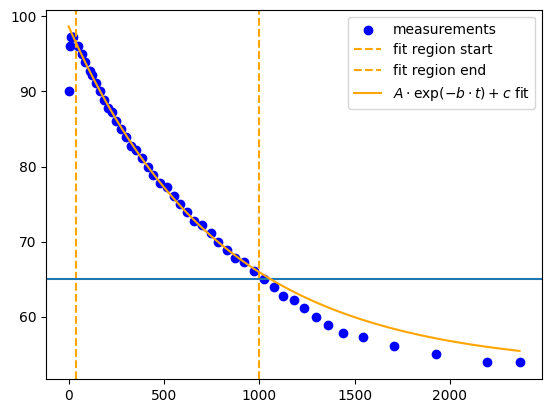

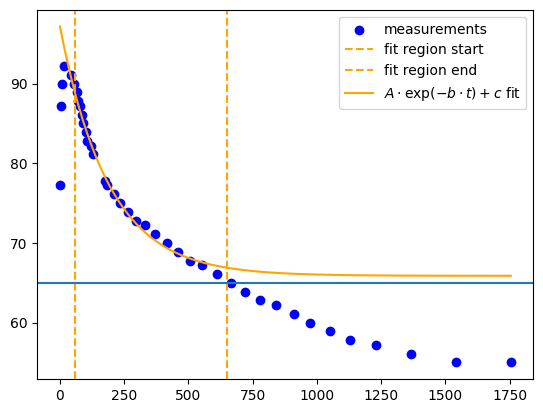

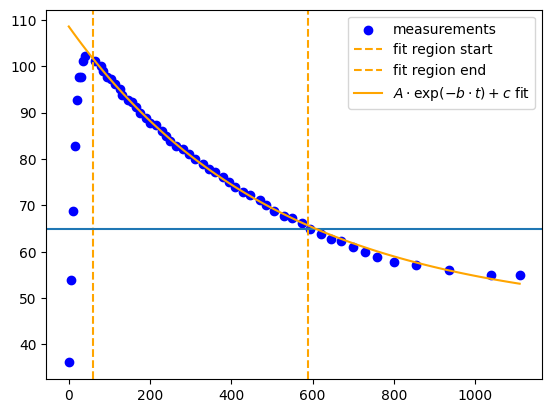

In [64]:


# for row in sep13_trial_one_data:
#         print(row)
    
# plt.plot()
# print(sep13_trial_one_data)

def exp_decline_fit(t, a, b, c):
    return a * np.exp(- t * b) + c

def fit_temperature_data_to_exponential_decline(all_secs, all_temps, start_time, end_time, plot_results=False):
    secs2fit, temps2fit = [], []
    for sec, T in zip(all_secs, all_temps):
        if sec >= start_time and sec <= end_time:
            secs2fit.append(sec)
            temps2fit.append(T)
    
    temp_initial = temps2fit[0]
    temp_final = temps2fit[-1]
    
    secs_initial = secs2fit[0]
    secs_final = secs2fit[-1]
    
    # parameters for a * exp(-t * b) + c - start with reasonable parameters,
    # like c = room temperature
    # a = (Temp_initial - c)*e^(b * t_initial)
    # b = (1/(t_i-t_f))*ln( (T_f-c)/(T_i-c) )
    cguess = 20
    bguess = (1 / (secs_initial - secs_final)) * np.log( (temp_final - cguess)/(temp_initial - cguess) )
    aguess = (temp_initial - cguess) * np.exp(bguess * secs_initial)
    
#     print(aguess,bguess,cguess)
    
    popt, pcov = scipy.optimize.curve_fit(
        exp_decline_fit,
        secs2fit,
        temps2fit,
        p0=[aguess,bguess,cguess],
        bounds=(
            [0,0,0],
            [aguess*20,bguess*20,cguess*20],
        ),
    )
    
    Afit, Bfit, Cfit = popt
    
    if plot_results:
        fig,ax = plt.subplots()
        ax.scatter(all_secs,all_temps, label="measurements",color="b")
        ax.axvline(start_time, color='orange', linestyle='dashed',label='fit region start')
        ax.axvline(end_time, color='orange', linestyle='dashed', label='fit region end')
        ax.axhline(65)
        
        example_times = np.linspace(all_secs[0], all_secs[-1], 100)
        ax.plot(example_times, exp_decline_fit(example_times, Afit, Bfit, Cfit),color="orange", label='$A\cdot\exp(-b \cdot t)+c$ fit')
        ax.legend()
        print("Afit,Bfit,Cfit:",Afit,Bfit,Cfit)
        print("Slope at fit region end: {} C/min".format(-60*Bfit * Afit * np.exp(-Bfit * secs_final)))
    
    
    
    return popt
    
#     print(popt)


A,B,C=fit_temperature_data_to_exponential_decline(sep13_trial_one_data[0], sep13_trial_one_data[1], 40,1000, plot_results=True)

A,B,C=fit_temperature_data_to_exponential_decline(sep13_trial_two_data[0], sep13_trial_two_data[1], 60,650, plot_results=True)

A,B,C=fit_temperature_data_to_exponential_decline(sep14_trial_one_data[0], sep14_trial_one_data[1], 60,590, plot_results=True)

